In [2]:
import selectivesearch
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def disp(img, title='', s=8, vmin=None, vmax=None):
    plt.figure(figsize=(s,s))
    plt.axis('off')
    if vmin is not None and vmax is not None:
        plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

def uint8ify(img):
    img -= img.min()
    img /= img.max()
    img *= 255
    return np.uint8(img)

def overlay(a,b):
    # a and b should be float images and between 0-1

    mask = a >= 0.5 # generate boolean mask of everywhere a > 0.5 
    ab = np.zeros_like(a) # generate an output container for the blended image 

    # now do the blending 
    ab[~mask] = (2*a*b)[~mask] # 2ab everywhere a<0.5
    ab[mask] = (1-2*(1-a)*(1-b))[mask] # else this
    
    return ab

def before_after(img_a, img_b, name='', vmin=None, vmax=None, effect_name='Processed'):
    fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(10,4))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].set_title(f'{name} Original')
    axs[1].set_title(f'{name} {effect_name}')
    if vmin is not None and vmax is not None:
        axs[0].imshow(img_a, cmap='gray', vmin=vmin, vmax=vmax)
        axs[1].imshow(img_b, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        axs[0].imshow(img_a, cmap='gray')
        axs[1].imshow(img_b, cmap='gray')
    plt.show()

In [9]:
img = rgb(cv2.imread('../dataset/images/20220000.png'))
img = cv2.resize(img, (256,256))

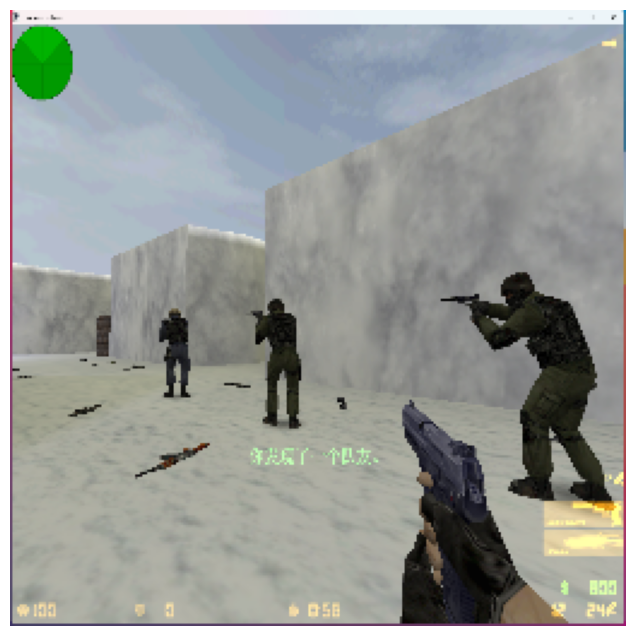

In [10]:
disp(img)

In [12]:

labels, regions = selectivesearch.selective_search(img)

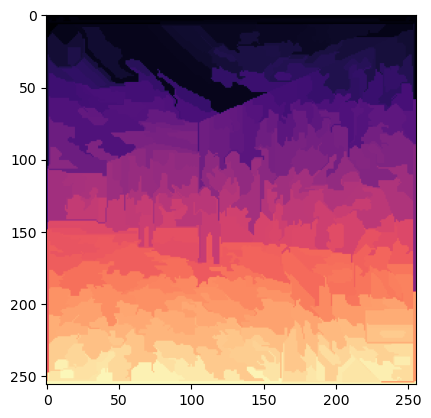

In [27]:
plt.imshow(labels[:, :, 3], cmap='magma')

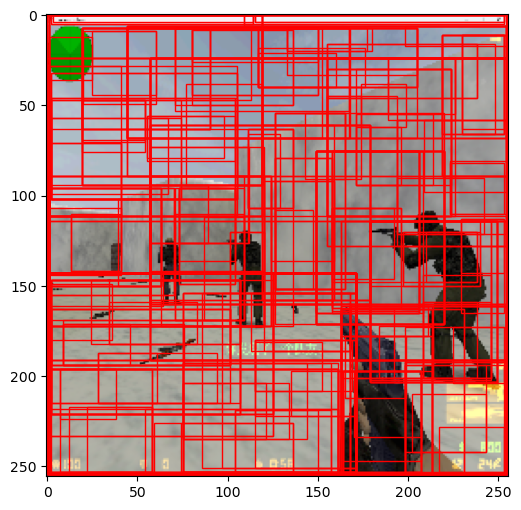

In [42]:
# draw rectangles on the original image
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(img)

for r in regions:
    # excluding same rectangle (with different segments)
    # if r['rect'] in [x['rect'] for x in regions if x['rect'] != r['rect']]:
    #     continue
    # excluding regions smaller than 2000 pixels
    if r['size'] < 400:
        continue
    # distorted rects
    x, y, w, h = r['rect']
    # if w / h > 1.2 or h / w > 1.2:
    #     continue
    ax.add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=1))